# Deep Belief Nets
### Examples covered in the notebook touches on:
1. Pre-training, 
2. feature extraction,
3. fine-tuning and 
4. classification

In [1]:
import os
os.chdir('/home/ekhongl/Codes/DL - Topic Modelling')

from __future__ import print_function, division
import sys
import timeit
from six.moves import cPickle as pickle

import numpy as np
import pandas as pd

import theano
import theano.tensor as T

from lib.deeplearning import deepbeliefnet

Using gpu device 0: Tesla K40c (CNMeM is disabled, cuDNN 5105)
/home/ekhongl/.conda/envs/py3/lib/python3.5/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)


In [2]:
# loading the data and transforming it into theano compatible variables
dat_x = np.genfromtxt('data/dtm_20news.csv', dtype='float32', delimiter=',', skip_header = 1)
dat_y = dat_x[:,0]
dat_x = dat_x[:,1:]
vocab =  np.genfromtxt('data/dtm_20news.csv', dtype=str, delimiter=',', max_rows = 1)[1:]
x = theano.shared(dat_x)
y = T.cast(dat_y, dtype='int32')

### ----------------------------------------------------------------------------------------------------------------------------------------------------------
## 1. Pretraining
### Fitting the data to the deep belief model
### ----------------------------------------------------------------------------------------------------------------------------------------------------------

In [3]:
model = deepbeliefnet(architecture = [2756, 500, 500, 128])
model.pretrain(input = x, pretraining_epochs = 10, output_path = 'params/to_delete')

... building the model
Building layer: 0
   Input units: 2756
  Output units: 500
Building layer: 1
   Input units: 500
  Output units: 500
Building layer: 2
   Input units: 500
  Output units: 128
... getting the pretraining functions
... pre-training the model
Pre-training layer 0, epoch 0, cost  3.40055
Pre-training layer 0, epoch 1, cost  316.852
Pre-training layer 0, epoch 2, cost  187.822
Pre-training layer 0, epoch 3, cost  235.748
Pre-training layer 0, epoch 4, cost  482.326
Pre-training layer 0, epoch 5, cost  781.283
Pre-training layer 0, epoch 6, cost  1069.41
Pre-training layer 0, epoch 7, cost  1219.49
Pre-training layer 0, epoch 8, cost  1332.43
Pre-training layer 0, epoch 9, cost  1432.57
Pre-training layer 1, epoch 0, cost  -350.494
Pre-training layer 1, epoch 1, cost  -407.415


The pretraining for layer 0 ran for 0.04m


Pre-training layer 1, epoch 2, cost  -503.391
Pre-training layer 1, epoch 3, cost  -445.068
Pre-training layer 1, epoch 4, cost  -410.088
Pre-training layer 1, epoch 5, cost  -878.342
Pre-training layer 1, epoch 6, cost  -392.33
Pre-training layer 1, epoch 7, cost  -435.701
Pre-training layer 1, epoch 8, cost  -599.734
Pre-training layer 1, epoch 9, cost  -392.364
Pre-training layer 2, epoch 0, cost  -309.853
Pre-training layer 2, epoch 1, cost  -132.85


The pretraining for layer 1 ran for 0.06m


Pre-training layer 2, epoch 2, cost  -249.506
Pre-training layer 2, epoch 3, cost  -159.328
Pre-training layer 2, epoch 4, cost  -472.888
Pre-training layer 2, epoch 5, cost  -320.437
Pre-training layer 2, epoch 6, cost  -412.642
Pre-training layer 2, epoch 7, cost  -138.762
Pre-training layer 2, epoch 8, cost  -256.535
Pre-training layer 2, epoch 9, cost  -194.618


The pretraining for layer 2 ran for 0.06m


### Visualizing the changes in likelihood for each iteration

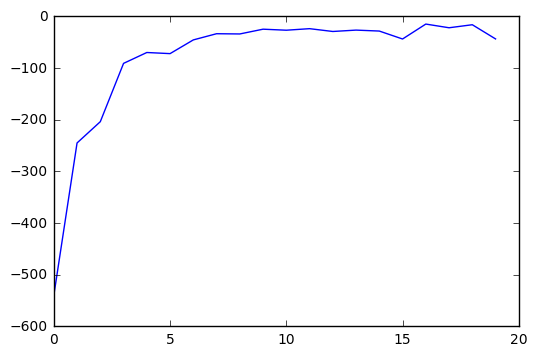

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt_dat = np.genfromtxt('params_2000/dbn_params_pretrain/lproxy_layer_2.csv', delimiter=',', names = True)[:20]
plt.plot(plt_dat)
plt.show()

### ----------------------------------------------------------------------------------------------------------------------------------------------------------
## 2. Extracting Features
### Retrieve features created by the unsupervised pretrained DBN outputs.
### ----------------------------------------------------------------------------------------------------------------------------------------------------------

In [31]:
model = deepbeliefnet(architecture = [2756, 500, 500, 128], opt_epochs = [900,5,10],
                      predefined_weights = 'params/dbn_params')
output = model.score(input = x)

... building the model
Building layer: 0
   Input units: 2756
  Output units: 500
Building layer: 1
   Input units: 500
  Output units: 500
Building layer: 2
   Input units: 500
  Output units: 128
Pre-trained DBN model from "params/dbn_params" loaded.


In [6]:
colnames = ['bit'] * 128
colnames = [colnames[i] + str(i) for i in range(128)]
colnames.insert(0,'_label_')
pd.DataFrame(data = np.c_[dat_y, output], 
             columns = colnames). \
             to_csv( 'data/dbn_features.csv', index = False)

### ----------------------------------------------------------------------------------------------------------------------------------------------------------
## 3. Fine-Tuning
### Demonstrates the conversion of a DBN into an MLP and training it w.r.t. to targets
### ----------------------------------------------------------------------------------------------------------------------------------------------------------

In [7]:
model = deepbeliefnet(architecture = [2756, 500, 500, 128], opt_epochs = [900,5,10], n_outs = 20, predefined_weights = 'params/dbn_params')
#model.train(x=x, y=y,batch_size = 70, training_epochs = 10, output_path = 'params/to_delete')
model.train(x=x, y=y, training_epochs = 10000, learning_rate = (1/70)/2, batch_size = 120,
            drop_out = [0.2, .5, .5, .5], output_path = 'params/to_delete')

... building the model
Building layer: 0
   Input units: 2756
  Output units: 500
Building layer: 1
   Input units: 500
  Output units: 500
Building layer: 2
   Input units: 500
  Output units: 128
Pre-trained DBN model from "params/dbn_params" loaded.
... getting the finetuning functions
... finetuning the model
epoch 1, minibatch 101/101, validation error 95.253623 %
     epoch 1, minibatch 101/101, test error of best model 95.241935 %
Saving model...
...model saved.
epoch 2, minibatch 101/101, validation error 95.000000 %
     epoch 2, minibatch 101/101, test error of best model 95.161290 %
Saving model...
...model saved.
epoch 3, minibatch 101/101, validation error 94.021739 %
     epoch 3, minibatch 101/101, test error of best model 94.596774 %
Saving model...
...model saved.
epoch 4, minibatch 101/101, validation error 93.297101 %
     epoch 4, minibatch 101/101, test error of best model 93.817204 %
Saving model...
...model saved.
epoch 5, minibatch 101/101, validation error 92.5

The fine tuning ran for 16.13m


### Loading the trained MLP

In [9]:
model = deepbeliefnet(architecture = [2756, 500, 500, 128], n_outs = 20, predefined_weights = 'params/to_delete/trained_dbn.pkl')

... building the model
Building layer: 0
   Input units: 2756
  Output units: 500
Building layer: 1
   Input units: 500
  Output units: 500
Building layer: 2
   Input units: 500
  Output units: 128
Fine-tuned (or MLP) model from "params/to_delete/trained_dbn.pkl" loaded.


### Calculating the accuracy of the trained model on the full dataset

In [10]:
sum([1 for i, j in zip(model.predict(x), dat_y) if i == j])/len(dat_y)

0.8958997238155938

### Demonstrating how the predict function can be used to calculated the classes

In [11]:
model.predict(x,prob=True)

array([[  9.86977935e-01,   6.72943715e-05,   4.30024073e-07, ...,
          1.64206012e-05,   2.02706110e-06,   9.68406815e-03],
       [  9.99687612e-01,   4.61518454e-07,   3.67210578e-06, ...,
          6.94850769e-07,   3.49400580e-08,   1.19424067e-05],
       [  9.35047448e-01,   6.55943179e-04,   2.22503932e-05, ...,
          4.64923278e-06,   1.19572242e-05,   2.95562036e-02],
       ..., 
       [  2.70321907e-04,   1.37912684e-06,   2.81152825e-08, ...,
          6.23549204e-06,   1.82347103e-05,   9.57813561e-01],
       [  9.08685979e-05,   5.38064614e-06,   2.95243666e-07, ...,
          1.37577663e-05,   1.62180935e-04,   9.60871935e-01],
       [  1.34823859e-01,   3.80856800e-05,   1.15504470e-02, ...,
          1.30842021e-02,   8.59890715e-04,   7.60234058e-01]], dtype=float32)